## Домашнее задание 3: kNN. Линейные модели. Работа с признаками

Правила:

* Домашнее задание оценивается в 10 баллов.

* Можно использовать без доказательства любые результаты, встречавшиеся на лекциях или семинарах по курсу, если получение этих результатов не является вопросом задания.

* Можно использовать любые свободные источники с *обязательным* указанием ссылки на них.

* Плагиат не допускается. При обнаружении случаев списывания, 0 за работу выставляется всем участникам нарушения, даже если можно установить, кто у кого списал.

* Старайтесь сделать код как можно более оптимальным. В частности, будет штрафоваться использование циклов в тех случаях, когда операцию можно совершить при помощи инструментов библиотек, о которых рассказывалось в курсе.  

**Пункты 1 и 3 при полном верном решении затем нормируются в 10-балльную шкалу.
Бонус учитывается отдельно.**

### Задание 1:  Визуализация решающих поверхностей в kNN.

Прочтите [статью](https://proglib.io/p/metod-k-blizhayshih-sosedey-k-nearest-neighbour-2021-07-19) про метод ближайших соседей. 

В этом задании мы изобразим решающую поверхность для классификатора kNN, чтобы наглядно увидеть, как классификатор принимает решения для новых объектов. Для простоты будем работать со встроенным в `sklearn` набором данных `wine`, содержащим информацию о характеристиках трёх видов вина. Описание набора можно найти [здесь](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_wine.html#sklearn.datasets.load_wine) и [здесь](https://rdrr.io/cran/rattle.data/man/wine.html). 

Загрузим набор данных и сохраним информацию о признаках в переменную `X`, а о зависимой переменной – в переменную `y`.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
from sklearn.datasets import load_wine

data = load_wine()
X = pd.DataFrame(data['data'], columns = data['feature_names'])
y = data['target']
X.head(5)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


**Задача 1.1 (0.5 балла)** Есть ли в наборе данных пропущенные значения? Если да, то удалите их. Есть ли в наборе данных категориальные переменные? Если да, то закодируйте их при помощи OneHot-кодирования.

Пропущенные значения:

In [4]:
X.isnull().values.any()

False

Есть ли категориальные переменные? 

**Нет**

**Задача 1.2 (0.5 балла)** Используя функцию `train_test_split()`, разделите выборку на тренировочную и тестовую, и долю тестовой выборки задайте равной 0.3. Так как разбиение осуществляется случайным образом, не забудьте зафиксировать `np.random.seed()` для воспроизводимости результатов.

PS: [seed](https://limitlessdatascience.wordpress.com/2019/02/18/use-of-numpy-random-seed-and-random_state-in-train_test-split-function/)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 0)

In [1]:
print(X_train.size, X_test.size)

NameError: ignored

<a id ='Задача_1.3'></a>
**Задача 1.3 (1 балл)** На тренировочной выборке обучите шесть классификаторов kNN, отличающихся только числом соседей. Для первого классификатора число соседей поставьте равным **1**, для второго - **3**, для третьего – **5**, для четвертого – **10**, для пятого – **15** и для шестого – **25** (обратите внимание на параметр `n_neighbours` класса `KNeighborsClassifier`). Для обучения используйте только два признака: `alcohol` и `magnesium` – и евклидово расстояние. Не забудьте масштабировать признаки, например, при помощи модуля `StandardScaler`.

Выведите *долю* правильных ответов на тренировочной и тестовой выборках для каждого классификатора.

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()
X_train_data = X_train[['alcohol', 'magnesium']]
X_test_data = X_test[['alcohol', 'magnesium']]
X_train_data = scaler.fit_transform(X_train_data)
X_test_data = scaler.fit_transform(X_test_data)


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

y0 = len(y_train)
y1 = len(y_test)

kn = [1, 3, 5, 10, 15, 25]
tr = []
ts = []
mod_list = [] # list of the models created
for i in kn:
    ans0 = 0
    ans1 = 0
    kNN = KNeighborsClassifier(n_neighbors=i) 
    #kNN.fit(X_train_data, y_train)
    mod_list.append(kNN.fit(X_train_data, y_train))
    for j in kNN.predict(X_train_data)/y_train:
        if j == 1:
            ans0 += 1
    tr.append(round(ans0/y0, 2))
    #print('train: ', round(ans0/y0, 2))
    for k in kNN.predict(X_test_data)/y_test:
        if k == 1:
            ans1 += 1
    ts.append(round(ans1/y1, 2))
    #print('test: ', round(ans1/y1, 2))
    
    #print(kNN.predict_proba(X_test_data))

<ipython-input-10-19d289a8cbe5>:16: RuntimeWarning: invalid value encountered in true_divide
  for j in kNN.predict(X_train_data)/y_train:
<ipython-input-10-19d289a8cbe5>:21: RuntimeWarning: divide by zero encountered in true_divide
  for k in kNN.predict(X_test_data)/y_test:
<ipython-input-10-19d289a8cbe5>:21: RuntimeWarning: invalid value encountered in true_divide
  for k in kNN.predict(X_test_data)/y_test:
<ipython-input-10-19d289a8cbe5>:16: RuntimeWarning: divide by zero encountered in true_divide
  for j in kNN.predict(X_train_data)/y_train:
<ipython-input-10-19d289a8cbe5>:16: RuntimeWarning: invalid value encountered in true_divide
  for j in kNN.predict(X_train_data)/y_train:
<ipython-input-10-19d289a8cbe5>:21: RuntimeWarning: divide by zero encountered in true_divide
  for k in kNN.predict(X_test_data)/y_test:
<ipython-input-10-19d289a8cbe5>:21: RuntimeWarning: invalid value encountered in true_divide
  for k in kNN.predict(X_test_data)/y_test:
<ipython-input-10-19d289a8cbe5>:

#### results_table
<a id ='results_table'></a>

In [ ]:
op = {'NN': kn, 'Train': tr, 'Test': ts}
op_df = pd.DataFrame(data=op)
op_df

,NN,Train,Test
0,1,0.68,0.46
1,3,0.55,0.50
2,5,0.48,0.48
3,10,0.47,0.50
4,15,0.46,0.52
5,25,0.40,0.50


**Задача 1.4 (0 баллов)** Установите библиотеку `mlxtend` командой ниже. Библиотеку также можно установить из терминала при помощи `pip` или `conda`, как указано [здесь](http://rasbt.github.io/mlxtend/installation/). 

In [ ]:
!pip install mlxtend

Если всё прошло успешно, то в выводе команды выше вы увидите сообщение вроде "successfully installed", а следующая ячейка выполнится без ошибок.

In [ ]:
import mlxtend

<a id ='soltion_surfaces'></a>
**Задача 1.5 (1 балл)** Библиотека `mlxtend` позволяет достаточно просто визуализировать решающие поверхности обученных классификаторов. Изучите [документацию](http://rasbt.github.io/mlxtend/user_guide/plotting/plot_decision_regions/) библиотеки и найдите, как можно построить несколько графиков решающих поверхностей на сетке (decision regions grid). Постройте такую сетку графиков для обученных выше классификаторов.

**Подсказки:**
1. Вы можете использовать готовый код, приведённый в документации, и адаптировать его для нашего случая.
2. Вам могут понадобиться дополнительные библиотеки, которые используются в примере из документации.
3. Обратите внимание на то, как нужно изменить параметры `gridspec.GridSpec()` и `itertools.product()` для нашего числа классификаторов. 
4. В функции `plot_decision_region()` используйте `y_train` и нужные столбцы из `X_train`. Возможно, их придётся перевести в формат массива `numpy`.
5. Если в задаче 1.3 вы сохраните обученные классификаторы в список, то не будет необходимости обучать их заново. 
6. Построение графика может занять некоторое время – придётся немного подождать!

In [ ]:
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions
import matplotlib.gridspec as gridspec
import itertools

KeyboardInterrupt: 

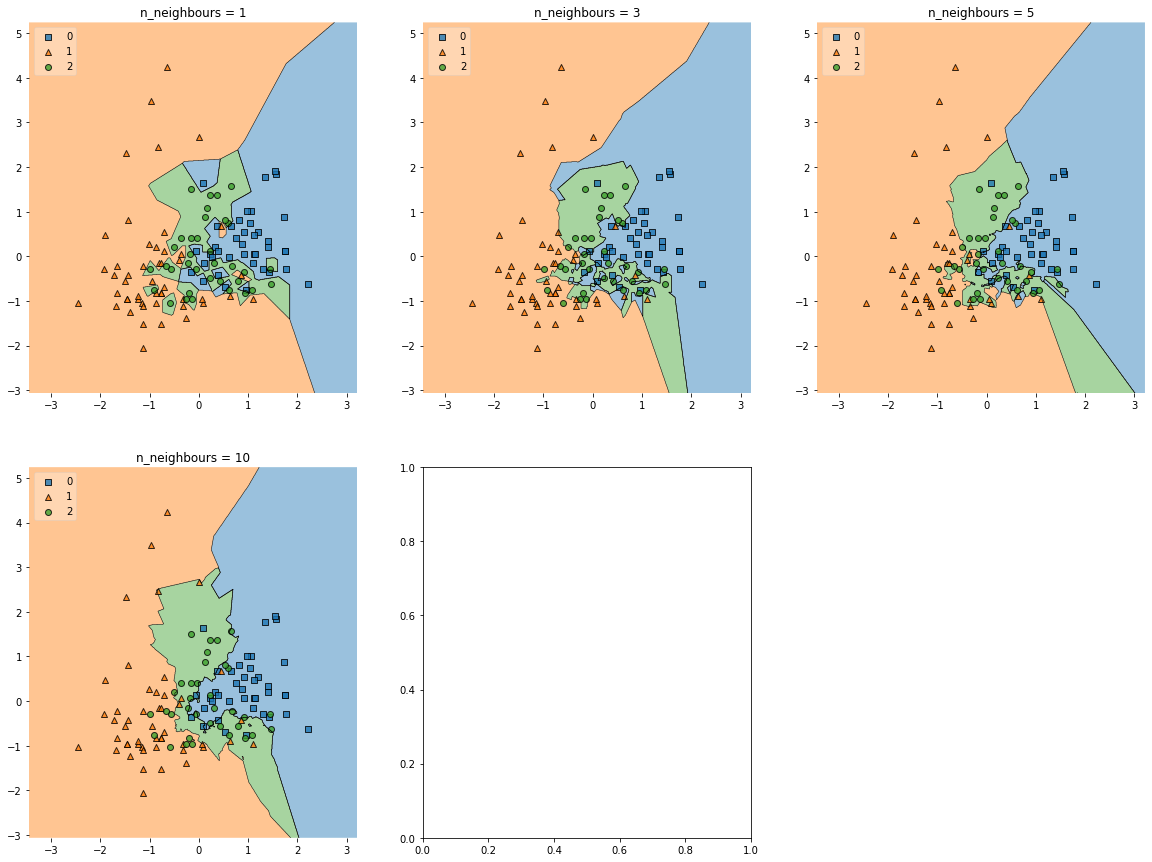

In [ ]:

gs = gridspec.GridSpec(2, 3)

fig = plt.figure(figsize=(20,15))

labels = ['n_neighbours = 1', 'n_neighbours = 3', 'n_neighbours = 5', 
          'n_neighbours = 10', 'n_neighbours = 15', 'n_neighbours = 25']
for kNN, lab, grd in zip(mod_list, labels, itertools.product([0, 1, 2], repeat=2)):

    ax = plt.subplot(gs[grd[0], grd[1]])
    fig = plot_decision_regions(X=X_train_data, y=y_train, clf=kNN, legend=2)
    plt.title(lab)

plt.show()

**Задача 1.6 (0.5 балла)** Прокомментируйте результаты, полученные в задачах 1.3 и 1.5. Какое число соседей оптимально использовать для обучения классификатора? Поясните ваш выбор при помощи описания геометрии данных и получаемой решающей поверхности.

In [ ]:
error_rate = []
for i in range(1, 30): # для удобства построения диапазон задан через range
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train_data,y_train)
    pred_i = knn.predict(X_test_data)
    error_rate.append(np.mean(pred_i != y_test))

plt.figure(figsize=(10,6))
plt.plot(range(1, 30), error_rate,color='blue', linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
print("Minimum error:-",min(error_rate),"at K =",error_rate.index(min(error_rate)))

По графику анализа ошибки оптимальное число соседей - 26, но большее число соседей влечёт за собой риск переобученности и роста требуемых мощностей. Можно заметить, что при k = 15, 20, 21, 22, 25 достигается предыдущий минимум. Таким образом, можно взять k = 15 без существенного убытия в ошибке. 

[Таблица результатов](#results_table): показывает, что trade-off достигается между 10 и 15 соседями. 

По [поверхностям обученных классификаторов](#soltion_surfaces) выглядит лучше всех k = 5, но поверхность рваная. 15 - имеет большее число "промахов". Оптимальное число графически - 10.

### Задание 2** (бонус): Обученная машина.

В этом задании мы рассмотрим упрощённую идею того, как метод ближайших соседей можно применить при моделировании движения робота. 

Рассмотрим робота на дискретной двумерной плоскости, который за каждый момент дискретного времени может передвинуться на одну позицию вправо, влево, вверх или вниз. На плоскости разбросаны метки одного из четырёх классов, анализируя которые робот может (но не обязан) корректировать своё перемещение. Пусть метки класса 0 соответствуют сигналу переместиться вправо, метки класса 1 – влево, класса 2 – вверх, класса 3 – вниз. 

Передвижение робота осуществляется по следующему правилу: с вероятностью 0.2 робот передвинется вправо, и с вероятностью 0.8 – оценит, метки какого класса преобладают среди `k` его ближайших соседей, и передвинется в направлении этого доминирующего класса. 

Для лучшего понимания происходящего изобразим возможное положение робота и меток:

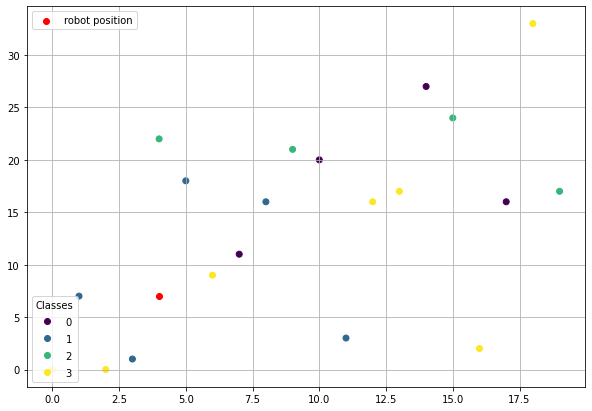

In [ ]:
np.random.seed(12345)
x = np.arange(20)
landmarks = x + np.round(np.random.normal(2, 8, 20)) # сгенерируем случайные метки
random_classes = np.random.randint(0, 4, 20)

fig, ax = plt.subplots(figsize = (10, 7))
scatter = ax.scatter(x, landmarks, c = random_classes)
ax.scatter(4, 7, c = 'r', marker = 'o', label = 'robot position')
legend1 = ax.legend(*scatter.legend_elements(),
                    loc = "lower left", title = "Classes")
ax.add_artist(legend1)

plt.plot()
_ = plt.legend()
_ = plt.grid()

На следующем шаге робот передвинется на 1 либо вправо, либо в направлении, которое указывают ближайшие соседи.

**Задача 2.1 (1.5 балла)** Реализуйте класс, который задаёт описанное поведение робота, используя шаблон ниже:
1. Определите атрибуты `trajectory` (переменная для хранения истории перемещения робота в виде последовательности точек с двумя координатами) и `knn` (обученный kNN классификатор, который по позиции метки предсказывает её класс).
2. Определите метод `move()`: рассчитайте новое положение робота по правилам выше и добавьте её в историю перемещений. Подсказка: исходы можно интерпретировать как результаты подбрасывания монетки с вероятностью орла, равной 0.2. Для моделирования такого подбрасывания можно использовать, например, `np.random.binomial()` с правильными параметрами. 

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
class MobileRobot():
    
    def __init__(self, k, initial_position, landmarks, classes):
        '''
        Attributes:
        ------
        k: int
            Number of neighbours
            
        initial_position: ndarray
            Initial position of the robot as a point, e.g. (-1, 1)
            
        landmarks: ndarray
            numpy array of shape (n_landmarks, 2) with the euclidean positions of points
        
        classes: ndarray
            numpy array of shape (n_landmarks, ) with class of landmark for each point in landmarks
        
        '''
        # Store the history of movements
        self.trajectory = # <ВАШ КОД ЗДЕСЬ>
        
        # kNN Classifier for determining the classes of landmarks
        self.knn = # <ВАШ КОД ЗДЕСЬ>
        
        # Mapping between classes of points and movements
        self.mapping = {0: np.array([1, 0]), 
                        1: np.array([-1, 0]),
                        2: np.array([0, 1]),
                        3: np.array([0, -1])}
        
    def move(self):
        '''
        Calculate new position of the robot and add it to the history
        '''
        
        # <ВАШ КОД ЗДЕСЬ>

**Задача 2.2 (0.5 балла)** Дополните функцию `conduct_experiment`: определите переменную `traj` так, чтобы она содержала историю перемещения робота в виде двумерного массива numpy, в котором столбцы соответствуют координатам x и y соответствующей позиции.

In [ ]:
def conduct_experiment(x,
                       mean = 0,
                       std = 2, 
                       n_movements = 10, 
                       k = 3, 
                       initial_position = np.array([10, 20])):
    
    np.random.seed(12345)
    # Generate random landmarks
    landmarks = np.vstack((x, x + np.round(np.random.normal(mean, std, len(x))))).T
    
    # Generate random classes of landmarks
    classes = np.random.randint(0, 4, size = len(x))
    
    # Conduct experiment
    robot = MobileRobot(k, initial_position, landmarks, classes)
    
    for n in range(n_movements):
        robot.move()
    
    fig, ax = plt.subplots(figsize = (10, 8))
    scatter = ax.scatter(landmarks[:, 0], landmarks[:, 1], c = classes)
    legend1 = ax.legend(*scatter.legend_elements(),
                        loc="lower left", title="classes")
    ax.add_artist(legend1)
    
    traj = # <ВАШ КОД ЗДЕСЬ>
    ax.plot(traj[:, 0], traj[:, 1], 
               c = 'r', marker = 'o', label = 'robot position')

    plt.plot()
    _ = plt.legend()
    _ = plt.grid()

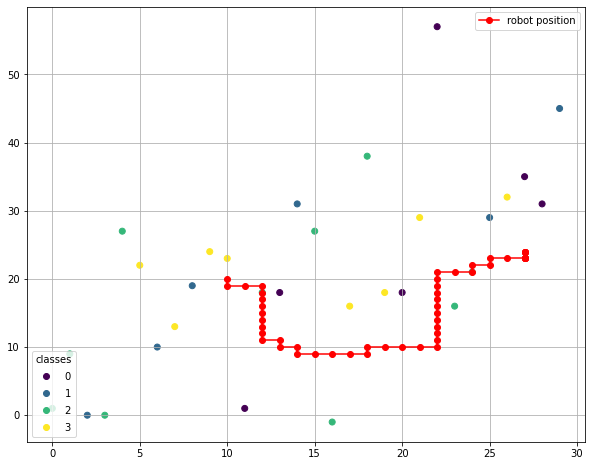

In [ ]:
x = np.arange(30)
conduct_experiment(x, mean = 3, std = 10, k = 5, n_movements = 50)

**Задача 2.3 (1 балл)** Как число соседей влияет на траекторию движения робота в нашем эксперименте? Постройте четыре графика с различным числом соседей на ваш выбор. А что было бы в случае, если классы назначаются меткам не случайно, а осмысленно? 

### Задание 3: Линейная регрессия.

В этом задании мы рассмотрим различные аспекты построения линейной модели. Мы будем работать с одним из классических наборов данных, содержащих информацию об автомобилях и их стоимости. [debug](https://stackoverflow.com/questions/29247712/how-to-replace-a-value-in-pandas-with-nan)

In [ ]:
data = pd.read_csv('Automobile.csv', sep=',', na_values=["?"])
data.head(5)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0


Мы будем решать задачу предсказания стоимости автомобиля `price` в зависимости от его характеристик.

**Задача 3.1 (0.1 балла)** Есть ли в наборе данных пропущенные значения? Обработайте их любым способом.

* если пропусков в столбце мало, можете удалить их
* если пропусков много, лучше заполнить их средним значением или медианой (по столбцу).

In [ ]:
data.isna().sum()

symboling             0
normalized-losses    41
make                  0
fuel-type             0
aspiration            0
num-of-doors          2
body-style            0
drive-wheels          0
engine-location       0
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-type           0
num-of-cylinders      0
engine-size           0
fuel-system           0
bore                  4
stroke                4
compression-ratio     0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64

Столбец `normalized-losses` содержит значительное кол-во пропусков. Остальные имеют малое количество `NaN`, но можно и их заменить **на среднее по столбцу**.

In [ ]:
data_1 = data.fillna(data.mean())
data_1

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,122.0,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95.0,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114.0,5400.0,23,28,16845.0
201,-1,95.0,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160.0,5300.0,19,25,19045.0
202,-1,95.0,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134.0,5500.0,18,23,21485.0
203,-1,95.0,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106.0,4800.0,26,27,22470.0


**Задача 3.2 (0.1 балла)** Есть ли в наборе данных бессмысленные столбцы (признаки, не несущие дополнительной информации)? Если да, то удалите их.

Среди приведённых признаков наименее информативные для общего ценообразования - это `bore` (ширина цилиндра), `stroke` (ход цилиндра), `compression-ratio` (отношение объёма цилиндра к объёму камеры сгорания), `fuel-system` (система впрыска топлива) - технические характеристики, заложенные в параметр `horsepower`; также `normalized-losses` (средняя потеря в цене за год), т.к автомобиль покупают, чтобы "ездить, а не продавать". Пожалуй, добавлю ещё `engine-location` - редкое решение для отдельных моделей авто (outliers); `num-of-cylinders` ~ `engine-size` - можно удалить первый признак (категориальный). 

In [ ]:
data_1 = data_1.drop(['bore', 'stroke', 'compression-ratio', 'normalized-losses', 'engine-location', 'num-of-cylinders', 
                      'fuel-system'], axis = 1)
data_1.head(5)

,symboling,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,wheel-base,length,width,height,curb-weight,engine-type,engine-size,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,alfa-romero,gas,std,two,convertible,rwd,88.6,168.8,64.1,48.8,2548,dohc,130,111.0,5000.0,21,27,13495.0
1,3,alfa-romero,gas,std,two,convertible,rwd,88.6,168.8,64.1,48.8,2548,dohc,130,111.0,5000.0,21,27,16500.0
2,1,alfa-romero,gas,std,two,hatchback,rwd,94.5,171.2,65.5,52.4,2823,ohcv,152,154.0,5000.0,19,26,16500.0
3,2,audi,gas,std,four,sedan,fwd,99.8,176.6,66.2,54.3,2337,ohc,109,102.0,5500.0,24,30,13950.0
4,2,audi,gas,std,four,sedan,4wd,99.4,176.6,66.4,54.3,2824,ohc,136,115.0,5500.0,18,22,17450.0


**Задача 3.3 (0.1 балла)** Постройте матрицу корреляций.

Какие вещественные признаки коррелируют с целевой переменной больше всего?

In [ ]:
numdata = data_1._get_numeric_data()
corr_df = numdata.corr()

In [ ]:
corr_df.style.background_gradient(cmap='coolwarm').set_precision(2)

,symboling,wheel-base,length,width,height,curb-weight,engine-size,horsepower,peak-rpm,city-mpg,highway-mpg,price
symboling,1.00,-0.53,-0.36,-0.23,-0.54,-0.23,-0.11,0.07,0.27,-0.04,0.03,-0.08
wheel-base,-0.53,1.00,0.87,0.80,0.59,0.78,0.57,0.35,-0.36,-0.47,-0.54,0.58
length,-0.36,0.87,1.00,0.84,0.49,0.88,0.68,0.55,-0.29,-0.67,-0.70,0.68
width,-0.23,0.80,0.84,1.00,0.28,0.87,0.74,0.64,-0.22,-0.64,-0.68,0.73
height,-0.54,0.59,0.49,0.28,1.00,0.30,0.07,-0.11,-0.32,-0.05,-0.11,0.13
curb-weight,-0.23,0.78,0.88,0.87,0.30,1.00,0.85,0.75,-0.27,-0.76,-0.80,0.82
engine-size,-0.11,0.57,0.68,0.74,0.07,0.85,1.00,0.81,-0.24,-0.65,-0.68,0.86
horsepower,0.07,0.35,0.55,0.64,-0.11,0.75,0.81,1.00,0.13,-0.80,-0.77,0.76
peak-rpm,0.27,-0.36,-0.29,-0.22,-0.32,-0.27,-0.24,0.13,1.00,-0.11,-0.05,-0.10
city-mpg,-0.04,-0.47,-0.67,-0.64,-0.05,-0.76,-0.65,-0.80,-0.11,1.00,0.97,-0.67


Наибольшая корреляция (более |0.5|) с `wheel-base`, `length`, `width`, `curb weigth`, `engine size`, `bore`, `horsepower`, `city mpg`, `highway mpg`.

**Задача 3.4 (0.1 балла)** Закодируйте категориальные признаки.

Можете использовать любые кодировки из библиотеки target_encoders или же OneHotEncoder из sklearn.

In [ ]:
data_1 = pd.get_dummies(data_1, columns=['make', 'aspiration', 'num-of-doors', 'body-style', 'drive-wheels', 
                                         'fuel-type', 'engine-type'], drop_first=True)
data_1.head()

,symboling,wheel-base,length,width,height,curb-weight,engine-size,horsepower,peak-rpm,city-mpg,...,body-style_wagon,drive-wheels_fwd,drive-wheels_rwd,fuel-type_gas,engine-type_dohcv,engine-type_l,engine-type_ohc,engine-type_ohcf,engine-type_ohcv,engine-type_rotor
0,3,88.6,168.8,64.1,48.8,2548,130,111.0,5000.0,21,...,0,0,1,1,0,0,0,0,0,0
1,3,88.6,168.8,64.1,48.8,2548,130,111.0,5000.0,21,...,0,0,1,1,0,0,0,0,0,0
2,1,94.5,171.2,65.5,52.4,2823,152,154.0,5000.0,19,...,0,0,1,1,0,0,0,0,1,0
3,2,99.8,176.6,66.2,54.3,2337,109,102.0,5500.0,24,...,0,1,0,1,0,0,1,0,0,0
4,2,99.4,176.6,66.4,54.3,2824,136,115.0,5500.0,18,...,0,0,0,1,0,0,1,0,0,0


**Задача 3.5 (0.2 балла)** Разделите выборку на тренировочную и тестовую. Долю тестовой выборки укажите равной 0.3.

In [ ]:
X = data_1.drop('price', axis = 1)
y = data_1['price']

In [ ]:
from sklearn.model_selection import train_test_split

Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.3)

**Задача 3.6 (0.3 балла)** Масштабируйте вещественные признаки тренировочной и тестовой выборок при помощи модуля `StandardScaler`.

In [ ]:
from sklearn.preprocessing import StandardScaler

scal = StandardScaler() 
#scal.fit_transform(X)
Xtrain_scal = pd.DataFrame(scal.fit_transform(Xtrain))
Xtest_scal = pd.DataFrame(scal.fit_transform(Xtest))
type(Xtest_scal)

pandas.core.frame.DataFrame

**Задача 3.7 (0.2 балла)** Оцените линейную регрессию на тренировочной выборке. Выведите среднеквадратичную ошибку на тренировочной и тестовой выборках, а также r2.

In [ ]:
# оценка на основе МНК
from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

lr = LinearRegression()
mod1 = lr.fit(Xtrain_scal, ytrain) # linear model fit based on the train sample

pred_train = lr.predict(Xtrain_scal) # prediction of y's based on the X's for train
pred_test = lr.predict(Xtest_scal) # and for the test samples2
print("Train R2: {}".format(round(r2_score(ytrain, pred_train), 3))) # comparison of the actual answers and predicted ones for train
print("Test R2: {}".format(round(r2_score(ytest, pred_test), 3))) # and test samplesПо критерию R2 качество *линейной* модели высокое.

Train R2: 0.957
Test R2: 0.778


По критерию R2 качество *линейной* модели высокое.

**Задача 3.8 (0.2 балла)** Изучите документацию модуля `LinearRegression` и выведите полученные оценки коэффициентов. Назовите вещественные переменные, оценки коэффициентов которых по модулю на порядок превышают оценки прочих вещественных переменных.

[pandas operations](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.divide.html)

In [ ]:
coefficients_lr = pd.concat([pd.DataFrame(Xtrain.columns),pd.DataFrame(np.transpose(mod1.coef_))], axis = 1)
coefficients_lr[coefficients_lr.iloc[:, 1].div(1000) > 1] # коэффициенты, имеющие порядок от 3-го и больше

,0,0
1,wheel-base,1400.378913
3,width,1298.730781
5,curb-weight,1924.951305
6,engine-size,4042.407870
12,make_bmw,1174.933223
44,engine-type_ohcf,2312.146686


In [ ]:
coefficients_lr

,0,0
0,symboling,-506.763814
1,wheel-base,1400.378913
2,length,-1373.990928
3,width,1298.730781
4,height,-663.367699
5,curb-weight,1924.951305
6,engine-size,4042.407870
7,horsepower,507.434345
8,peak-rpm,993.305725
9,city-mpg,918.471651


**Задача 3.9 (0.4 балла)** Как можно заметить из анализа корреляционной матрицы в задаче 3.3, между некоторыми признаками имеется сильная корреляция, что может быть индикатором проблемы *мультиколлинеарности*. Различия в порядке коэффициентов, выявленные в предыдущей задаче также намекают на её присутствие. Как известно, для решения этой проблемы можно либо исключить некоторые признаки из модели, либо использовать регуляризацию. Мы воспользуемся вторым вариантом. 

Вспомним, что смысл регуляризации заключается в том, чтобы изменить функцию потерь так, чтобы устранить проблемы, появляющиеся из-за мультиколлинеарности. При L1-регуляризации предлагается минимизировать следующую функцию потерь:

$$
\|y - X\hat{w}\|^2 + \alpha\sum_{i=1}^k|w_i|
$$

Такая модель называется Lasso-регрессией.

При L2-регуляризации предлагается минимизировать следующую функцию потерь:

$$
\|y - X\hat{w}\|^2 + \frac{1}{2}\alpha\|w\|^2
$$

Такая модель называется Ridge-регрессией. 

Обучите Lasso-регрессию и Ridge-регрессию, уставновив гиперпараметр регуляризации равным 10. Для этого используйте модули `Lasso` и `Ridge` из `sklearn`. Сильно ли уменьшились веса? Сделайте вывод о том, насколько сильно проблема мультиколлинеарности проявлялась в изначальной регрессии.

### Lasso

In [ ]:
from sklearn import linear_model
a = 10
lm_lasso = linear_model.Lasso(alpha=a)
mod2 = lm_lasso.fit(Xtrain_scal, ytrain)
coefficients_lasso = pd.concat([pd.DataFrame(Xtrain.columns),pd.DataFrame(np.transpose(mod2.coef_))], axis = 1)
#coefficients_lasso = coefficients_lasso.iloc[:, 1].div(coefficients_lr.iloc[:, 1])
coefficients_lasso.iloc[:, 1] = coefficients_lasso.iloc[:, 1].div(coefficients_lr.iloc[:, 1]) 
#print(mod2.coef_)
#print(mod2.intercept_)

In [ ]:
coefficients_lasso[abs(coefficients_lasso.iloc[:, 1]) > 10]

,0,0


Таблица выше показывает те коэффициенты, которые по абсолютной величине больше хотя бы на 1 порядок таковых линейной модели. Как итог, только мощность в л.с `horsepower` оказалась в 12 раз больше исходного значения.  
Остальные же коэф-ты выросли по модулю менее значительно: 

In [ ]:
coefficients_lasso[abs(coefficients_lasso.iloc[:, 1]) > 1]

,0,0
3,width,1.084178
7,horsepower,1.854428
11,make_audi,-3.099451
12,make_bmw,1.558275
17,make_jaguar,-3.053424
19,make_mercedes-benz,2.371509
25,make_porsche,3.026543
27,make_saab,4.446581
34,body-style_hardtop,1.014339
36,body-style_sedan,1.037214


### Ridge

In [ ]:
lm_ridge = linear_model.Ridge(alpha=a)
mod3 = lm_ridge.fit(Xtrain_scal, ytrain)
coefficients_ridge = pd.concat([pd.DataFrame(Xtrain.columns),pd.DataFrame(np.transpose(mod3.coef_))], axis = 1)
#coefficients_lasso = coefficients_lasso.iloc[:, 1].div(coefficients_lr.iloc[:, 1])
coefficients_ridge.iloc[:, 1] = coefficients_ridge.iloc[:, 1].div(coefficients_lr.iloc[:, 1]) 
#print(mod2.coef_)
#print(mod2.intercept_)

In [ ]:
coefficients_ridge[abs(coefficients_ridge.iloc[:, 1]) > 10]

,0,0


По таблице ниже можно сделать вывод, что результат, в целом, аналогичен: `horsepower` и `make_porsche` (был очень близок к изменению на порядок в lasso).
Остальные коэф-ты по-прежнему изменились менее значительно:

In [ ]:
coefficients_ridge[abs(coefficients_ridge.iloc[:, 1]) > 1]

,0,0
7,horsepower,2.508989
11,make_audi,-2.632384
12,make_bmw,1.331947
17,make_jaguar,-3.674943
19,make_mercedes-benz,2.405373
25,make_porsche,4.251006
27,make_saab,1.355699


[VIF](https://www.geeksforgeeks.org/detecting-multicollinearity-with-vif-python/) - тест на мультиколлинеарность.  
Т.к он обратнопропорционален $R^2$, болшее значение VIF означает большую взаимосвязанность переменных, следовательно, наличие коллинеарности.  
Rule of thumb: if $VIF > 5 \space \Rightarrow $ Multicollinearity

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
  
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(Xtrain_scal.values, i)
                          for i in range(len(Xtrain_scal.columns))]
  
print(vif_data)

                 feature        VIF
0              symboling   6.864671
1             wheel-base  26.064562
2                 length  26.657275
3                  width  14.966819
4                 height   8.482114
5            curb-weight  73.833600
6            engine-size  37.220213
7             horsepower  59.115428
8               peak-rpm   6.737317
9               city-mpg  54.267445
10           highway-mpg  34.257926
11             make_audi   8.948447
12              make_bmw   9.902897
13        make_chevrolet   4.299145
14            make_dodge  13.070168
15            make_honda  13.303921
16            make_isuzu   2.271921
17           make_jaguar   7.664964
18            make_mazda   9.690272
19    make_mercedes-benz  13.359956
20          make_mercury   2.474860
21       make_mitsubishi  15.808052
22           make_nissan  10.355261
23           make_peugot        inf
24         make_plymouth   3.559264
25          make_porsche  11.433477
26          make_renault   3

C:\Users\faliaksandrovich\Anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


### Multicollinearity
1) Исходные переменные имеют значительную корреляцию;  
2) Некоторые переменные имеют противоречивый знак (`make_porsche`, `drive-wheels_fwd` и прочие);  
3) VIF-тест показал, что большая часть переменных имеют существенное влияние друг на друга;  
Таким образом, проблема мультиколинеарности достаточно высокая и необходим дальнейший отбор переменных для построения более точной модели.

**Задача 3.10 (0.4 балла)** Как обсуждалось на семинарах, Lasso-регрессию можно использовать для отбора наиболее информативных признаков. Для следующих значений параметра регуляриазции $\alpha$: 0.1, 1, 10, 100, 200 –  обучите Lasso- и Ridge-регрессии и постройте график измненения евклидовой нормы весов (`np.linalg.norm()` от вектора оценок коэффициентов) в зависимости от параметра $\alpha$. Как известно, норма является численной характеристикой величины вектора, а потому по норме можно судить о том, насколько большие элементы содержит вектор оценок коэффициентов. 

Какой метод агрессивнее уменьшает веса? Поясните, почему Lasso-регрессию часто используют для отбора признаков.

[L1/L2 norm comparison](https://towardsdatascience.com/visualizing-regularization-and-the-l1-and-l2-norms-d962aa769932)

### Lasso norm weights

In [ ]:
norm_lasso = []
alp = [0.1, 1, 10, 100, 200]
for a in alp:
    lm_lasso = linear_model.Lasso(alpha=a)
    lm_lasso.fit(Xtrain_scal, ytrain)
    coefficients_lasso = pd.concat([pd.DataFrame(Xtrain.columns),pd.DataFrame(np.transpose(lm_lasso.coef_))], axis = 1)
    norm_lasso.append(np.linalg.norm(coefficients_lasso.iloc[:, 1]))

In [ ]:
#print(norm_lasso)

### Ridge norm weights

In [ ]:
norm_ridge = []

for a in alp:
    lm_ridge = linear_model.Ridge(alpha=a)
    lm_ridge.fit(Xtrain_scal, ytrain)
    coefficients_ridge = pd.concat([pd.DataFrame(Xtrain.columns),pd.DataFrame(np.transpose(lm_ridge.coef_))], axis = 1)
    norm_ridge.append(np.linalg.norm(coefficients_ridge.iloc[:, 1]))

In [ ]:
#print(norm_ridge)

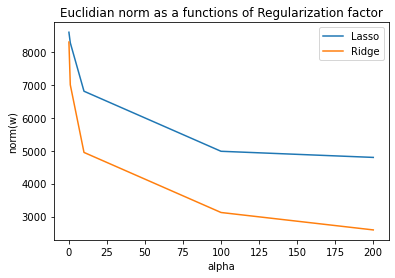

In [ ]:
import matplotlib.pyplot as plt

plt.plot(alp, norm_lasso)
plt.plot(alp, norm_ridge)

plt.xlabel("alpha")
plt.ylabel("norm(w)")
plt.title("Euclidian norm as a functions of Regularization factor")
plt.legend(["Lasso", "Ridge"])

plt.show()

'>> Какой метод агрессивнее уменьшает веса?  
Ridge  
'>> Поясните, почему Lasso-регрессию часто используют для отбора признаков.  
Данный метод в отличие от Ridge **позволяет приравнивать коэффициенты к 0**, таким образом уменьшая число переменных в рассмотрении (исключает влияние переменной). [source](https://www.geeksforgeeks.org/lasso-vs-ridge-vs-elastic-net-ml/#:~:text=The%20difference%20between%20ridge%20and,with%20some%20types%20of%20data.)

**Задача 3.11 (0.5 балла)** 
В зависимости от значения параметра $\alpha$ в Lasso-регрессии зануляются разные оценки коэффициентов. Оптимальное значение $\alpha$ можно подобрать, например, при помощи кросс-валидации по тренировочной выборке. 

Для проведения кросс-валидации можно использовать модуль `LassoCV`. Этот модуль принимает список значений $\alpha$ (параметр `alphas`) и при обучении проводит кросс-валидацию для каждого значения из этого списка, сохраняя MSE на каждом участке кросс-валидации (количество участков – параметр `cv`) в матрицу ошибок (то есть итоговая матрица будет иметь размер `len(alphas)` $\times$ `cv`). После обучения модели матрицу ошибок можно получить, обратившись к атрибуту `.mse_path_`. 

Заметим, что модель может использовать $\alpha$ не в том порядке, в котором вы подаёте их в функцию: для определения порядка используйте атрибут `.alphas_` Установите количество участков для кросс-валидации (параметр `cv`) равным 5.

Усредните ошибки для каждого значения $\alpha$ (то есть по строкам матрицы ошибок) и выберите то значение, которое даёт наибольшее качество. 

In [ ]:
from sklearn.linear_model import LassoCV
from sklearn.datasets import make_regression

reg = LassoCV(cv = 5, n_alphas= len(alp), alphas = alp).fit(Xtrain_scal, ytrain)


In [ ]:
from statistics import mean
da = {'Alpha': list(reg.alphas_), 'MSE': [round(mean(i), 0) for i in list(reg.mse_path_)]}
a_mse = pd.DataFrame(da)
a_mse

,Alpha,MSE
0,200.0,17099937.0
1,100.0,15850743.0
2,10.0,13394019.0
3,1.0,14170565.0
4,0.1,14418682.0


In [ ]:
from sklearn.linear_model import RidgeCV
regr_cv = LassoCV(alphas = alp)
model_cv = regr_cv.fit(Xtrain_scal, ytrain)
print("Оптимальное значение параметра альфа (параметр регуляризации): ", model_cv.alpha_)

Оптимальное значение параметра альфа (параметр регуляризации):  10.0


**Задача 3.12 (0.5 балла)** Обучите итоговую Lasso-регрессию с выбранным параметром $\alpha$ на тренировочной выборке. Выведите полученные коэффициенты и прокомментируйте, какие признаки оказались неинформативными, а какие – наиболее информативными. Приведите возможное смысловое объяснение этого результата.

In [ ]:
lm_lasso = linear_model.Lasso(alpha=model_cv.alpha_)
lm_lasso.fit(Xtrain_scal, ytrain)
coefficients_lasso = pd.concat([pd.DataFrame(Xtrain.columns),pd.DataFrame(np.transpose(lm_lasso.coef_))], axis = 1)

In [ ]:
coefficients_lasso

,0,0
0,symboling,-365.801351
1,wheel-base,404.200439
2,length,-480.960952
3,width,1408.054710
4,height,-318.896662
5,curb-weight,800.899469
6,engine-size,3656.467007
7,horsepower,941.000271
8,peak-rpm,678.146067
9,city-mpg,353.872579


* Неинформативные: `make_isuzu`, `make_peugot`, `make_volvo`, `drive-wheels_rwd`  
* Информативные (более 1000 по абс. величине): `width`, `engine-size`, `horsepower`, `make_bmw`, `make_mercedes-benz`, `make_subaru`, `body-style_sedan`, `engine-type_dohcv`, `engine-type_ohcf`  

&emsp; Среди неинформативных признаков наибольший интерес представляет `drive-wheels_rwd` (задний привод), т.к это один из основных параметров автомобиля и ожидается его влияние на цену, однако, данный признак "перекрывается" параметром `drive-wheels_fwd` (полный привод), поэтому наличие в модели обоих излишне. Неинформативность некоторых марок (Isuzu, Volvo, Peugeot) может быть связано с малой "силой бренда" или его незначительностью на фоне осталбных критериев.  

&emsp; Наиболее информативные параметры, в целом, полностью ожидаемы: большая мощность и объём двигателя по умолчанию увеличивают стоимость автомобиля, марка BMW-MB сильно себя зарекомендовали, поэтому цена и выше, как правило. Обратный эффект с Subaru, видимо, связан с их ["4-м цилиндром"](https://olive.com/subaru-engine-problems-you-should-know-about-if-youre-shopping-for-a-used-one/) (конструктивной сложностью двигателя).
&emsp; По части типов двигателей (`dohcv`, `ohcf`) - здесь трудно говорить детально не будучи конструктуром. Видимо, производительность, мощность с двигателя, конструктивная сложность оказывают влияние.

**Задача 3.13 (0.4 балла)** Сделайте предсказания обученной Lasso-регрессии на тестовой выборке и сравните среднеквадратичную ошибку с ошибкой обычной линейной регрессии из задачи 3.7. Какую модель лучше использовать для предсказаний? Приведите возможное объяснение, почему одна модель оказалась лучше другой.

In [ ]:
lasso_pred_test = lm_lasso.predict(Xtest_scal)
print("Lasso Test R2: {}".format(round(r2_score(ytest, lasso_pred_test), 3)))
print("LR Test R2: {}".format(round(r2_score(ytest, pred_test), 3)))

Lasso Test R2: 0.802
LR Test R2: 0.778


&emsp; Lasso-регрессия имеет немного лучший результат. Это достигнуто за счёт того, модель подбирает набор данных с наименьшей [мультиколлинеарностью](https://towardsdatascience.com/lasso-increases-the-interpretability-and-accuracy-of-linear-models-c1b340561c10#:~:text=LASSO%20in%20GLMs%20is%20powerful,with%20subsets%20of%20the%20feature.&text=Another%20advantage%20of%20LASSO%20versus,features%20that%20have%20less%20collinearity.), т.о ошибка модели уменьшается.